# Generating Photometry

Photometry can be generated by combining any ``Sed`` with any ``FilterCollection``. There is no requirement on the dimensions of the ``Sed``; photometry will be produced by convolution of the filter transmission curves with the final axis of the ``Sed`` array, which is always the wavelength axis.

In [1]:
from synthesizer.filters import UVJ
from synthesizer.grid import Grid

# Get the grid
grid_dir = "../../../tests/test_grid/"
grid_name = "test_grid"
grid = Grid(grid_name, grid_dir=grid_dir)

# Get an Sed
log10age = 6.0  # log10(age/yr)
metallicity = 0.01
spectra_id = "incident"
grid_point = grid.get_grid_point((log10age, metallicity))
sed = grid.get_spectra(grid_point, spectra_id=spectra_id)
sed *= 1e8  # multiply initial stellar mass
sed.get_fnu0()

# Get a UVJ filter collection
uvj = UVJ(new_lam=grid.lam)

To get photometry in the rest frame we can call the ``get_photo_luminosities`` method.

In [2]:
lums = sed.get_photo_luminosities(uvj)

Printing a ``PhotometryCollection`` yields a table of photometry.

In [3]:
print(lums)

--------------------------------------------
|         PHOTOMETRY (LUMINOSITY)          |
|--------------------|---------------------|
| U (λ = 3.64e+03 Å) | 5.75e+28 erg/(Hz*s) |
|--------------------|---------------------|
| V (λ = 5.51e+03 Å) | 3.22e+28 erg/(Hz*s) |
|--------------------|---------------------|
| J (λ = 1.22e+04 Å) | 8.24e+27 erg/(Hz*s) |
--------------------------------------------





For fluxes we can call the ``get_photo_fluxes`` method.

In [4]:
fluxes = sed.get_photo_fluxes(uvj)
print(fluxes)

--------------------------------------------------
|               PHOTOMETRY (FLUX)                |
|--------------------|---------------------------|
| U (λ = 3.64e+03 Å) | 4.81e-12 erg/(Hz*cm**2*s) |
|--------------------|---------------------------|
| V (λ = 5.51e+03 Å) | 2.69e-12 erg/(Hz*cm**2*s) |
|--------------------|---------------------------|
| J (λ = 1.22e+04 Å) | 6.89e-13 erg/(Hz*cm**2*s) |
--------------------------------------------------



## Plotting photometry

In addition to printing a table of photometry we can also visualise the photometry alongside their filter curves. 

(<Figure size 350x500 with 2 Axes>,
 <Axes: xlabel='$\\lambda_\\mathrm{obs}/[\\mathrm{\\AA}]$', ylabel='$F/[\\mathrm{\\rm{erg} \\ / \\ \\rm{Hz \\cdot \\rm{cm}^{2} \\cdot \\rm{s}}}]$'>)

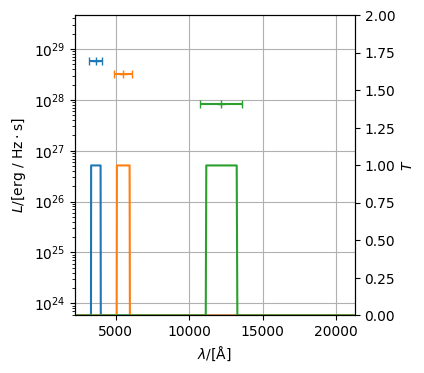

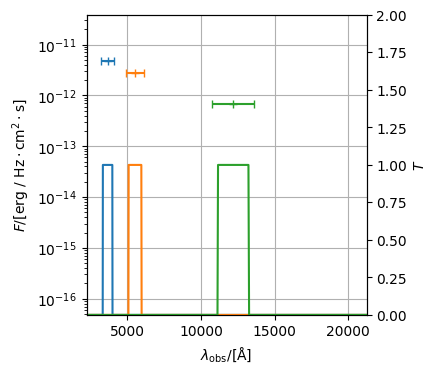

In [5]:
lums.plot_photometry(show=True)
fluxes.plot_photometry(show=True)